# QUESTION 1

TWO YEAR HISTORICAL DATA FOR SHELL

In [12]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [2]:
Shell_data = yf.download('SHEL', start='2020-01-01', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
Shell_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.459999,59.770000,59.240002,59.740002,51.195168,3085246
2020-01-03,59.880001,60.349998,59.880001,60.209999,51.597950,3713515
2020-01-06,60.959999,61.169998,60.689999,60.959999,52.240665,3250736
2020-01-07,60.349998,60.430000,59.830002,60.400002,51.760765,2683199
2020-01-08,59.810001,59.930000,59.400002,59.689999,51.152325,2966175


In [4]:
Shell_data['Adj Close'].head() 

Date
2020-01-02    51.195168
2020-01-03    51.597950
2020-01-06    52.240665
2020-01-07    51.760765
2020-01-08    51.152325
Name: Adj Close, dtype: float64

In [5]:
data = Shell_data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 505 entries, 2020-01-02 to 2021-12-31
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
505 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [6]:
data.head()

Date
2020-01-02    51.195168
2020-01-03    51.597950
2020-01-06    52.240665
2020-01-07    51.760765
2020-01-08    51.152325
Name: Adj Close, dtype: float64

In [7]:
data.tail()

Date
2021-12-27    41.479107
2021-12-28    41.189037
2021-12-29    40.870907
2021-12-30    40.608913
2021-12-31    40.608913
Name: Adj Close, dtype: float64

In [9]:
data.describe().round(2)

count    505.00
mean      34.60
std        6.70
min       18.86
25%       29.21
50%       35.58
75%       38.34
max       52.24
Name: Adj Close, dtype: float64

array([<Axes: xlabel='Date'>], dtype=object)

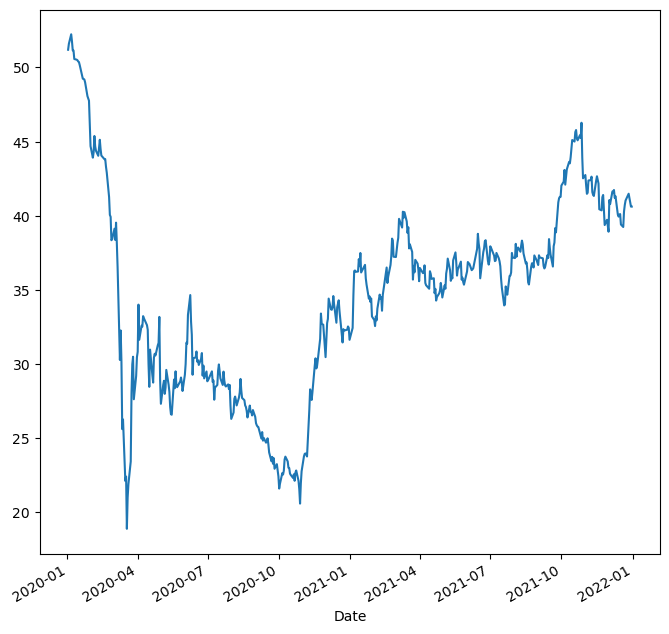

In [166]:
data.plot(figsize=(8,8), subplots=True)

ANNUALISED AVERAGE RETURN AND STANDARD DEVIATION

In [75]:
#Changing the list variable to numpy array:
log_return=np.array(log_return)
#calculating the mean and standard deviation using numpy:
mean_logr = log_return.mean() * len(log_return)
sd_logr = log_return.std() * (len(log_return) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (mean_logr,sd_logr))

The annulized normal return is -0.23165771 and its annulized volatility is 0.71159358


# QUESTION 2

BINOMIAL TREE METHOD

In [139]:
S0 = 32.42             # spot stock price
K = 30.0               # strike
T = 1.0                 # maturity 
r = 0.03                 # risk free rate 
sigma = 0.7115               # standard deviation (volatility)
N = 3                   # number of periods or number of time steps  
payoff = "call"          # payoff 

In [140]:
dT = float(T) / N                             # Delta t
u = np.exp(sigma * np.sqrt(dT))               # up factor
d = 1.0 / u                                   # down factor 

In [141]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [142]:
print('The up factor u is ',(u))

The up factor u is  1.5080006739896734


In [143]:
print('The down factor d is ',(d))

The down factor d is  0.6631296770937968


In [145]:
print('The binomial tree presenting SHEL price over 3 time steps ', '\n', (S))

The binomial tree presenting SHEL price over 3 time steps  
 [[ 32.42        48.88938185  73.72522078 111.17768263]
 [  0.          21.49866413  32.42        48.88938185]
 [  0.           0.          14.2564022   21.49866413]
 [  0.           0.           0.           9.45384339]]


In [146]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print('Risk-neutral porbability is ', (p))

Risk-neutral porbability is  0.4106194806840153


In [147]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        , 81.17768263],
       [ 0.        ,  0.        ,  0.        , 18.88938185],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [150]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
print('The option values at earlier nodes ', '\n', (V))

The option values at earlier nodes  
 [[10.9190778  22.37805019 44.02372577 81.17768263]
 [ 0.          3.12184226  7.67917121 18.88938185]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [151]:
print('Binomial tree & Option price - European ' + payoff, str( V[0,0]))

Binomial tree & Option price - European call 10.919077801906484


MONTE CARLO SIMULATION

In [69]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])    
    return S

In [70]:
T = 1
r = 0.03
sigma = 0.7115
S0 = 32.42
K = 30.0

In [71]:
S = mcs_simulation_np(1000)

In [72]:
S = np.transpose(S)
S

array([[32.42      , 31.97894926, 32.78725482, ..., 11.28770633,
        11.45295173, 11.43484448],
       [32.42      , 32.56682219, 32.32731954, ..., 33.66426102,
        34.4133873 , 33.35754634],
       [32.42      , 32.59464771, 33.18160172, ..., 17.65424968,
        17.66712972, 17.84140385],
       ...,
       [32.42      , 33.12412029, 31.8421865 , ..., 28.89495481,
        29.91223102, 29.69917307],
       [32.42      , 32.32734223, 31.35215923, ..., 95.11105928,
        97.23656876, 97.50508061],
       [32.42      , 31.75822347, 30.94057775, ..., 16.20448917,
        16.22406128, 16.23474257]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

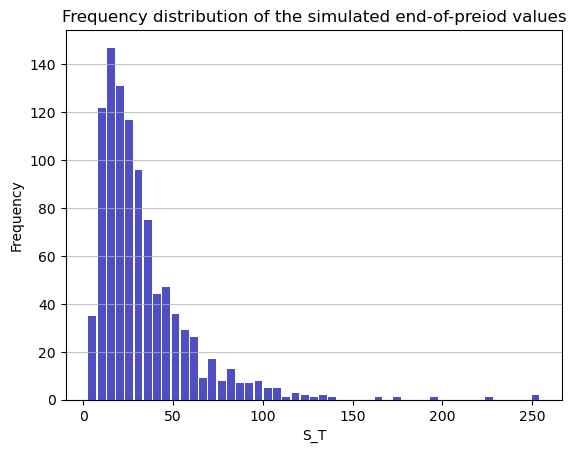

In [73]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [77]:
c = np.exp(-r*T)*np.mean(np.maximum(S[:,-1] - K,0))
print('Monte Carlo Simulation European call', str(c))

Monte Carlo Simulation European call 10.054014725571129


# QUESTION 3

GREEKS

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

In [115]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [116]:
euro_option_bs(32.42, 30, 1, 0.03, 0.7115, 'call')

10.299011669918908

DELTA

In [86]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [87]:
delta(32.42, 30, 1, 0.03, 0.7115, 'call')

0.6939047210779778

In [117]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 30, 1, 0.03, 0.7115, 'call')

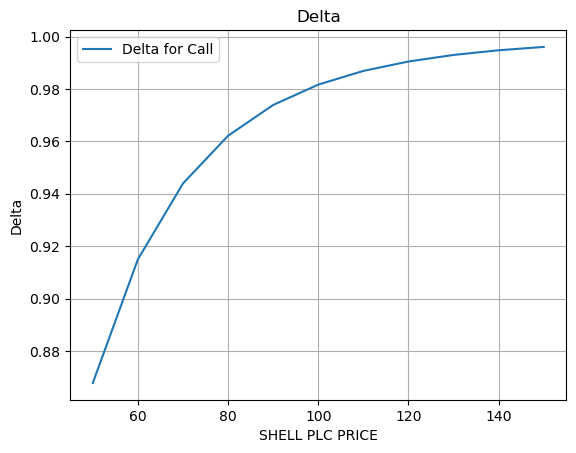

In [119]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('SHELL PLC PRICE')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])

GAMMA

In [94]:
def gamma(S, K, T, r,  vol, payoff):
    
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))

    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)

    
    return gamma

In [120]:
gamma(32.42, 30, 1, 0.03, 0.7115, 'call')

0.01520953317380621

In [121]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 30, 1, 0.03, 0.7115, 'call')

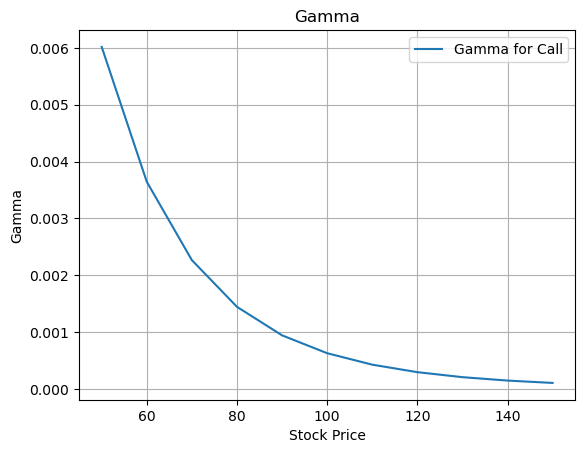

In [122]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

RHO

In [99]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [100]:
rho(32.42, 30, 1, 0.03, 0.7115, 'call')

12.197379387429134

In [154]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(32.42, 30, 1, r[i], 0.7115, 'call')

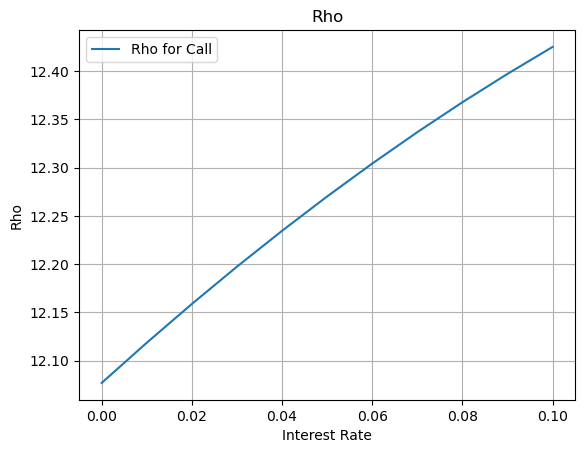

In [161]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

VEGA

In [104]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [105]:
vega(32.42, 30, 1, 0.03, 0.7115, 'call')

11.374093915947357

In [107]:
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(100, 100, 1, 0.05, vol[i], 'call')

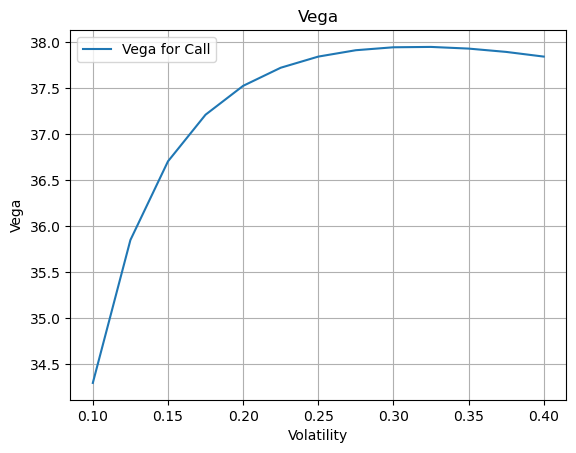

In [153]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

THETA

In [109]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [110]:
theta(32.42, 30, 1, 0.03, 0.7115, 'call')

-4.412255292221146

In [158]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(32.42, 30, T[i], 0.03, 0.7115, 'call')

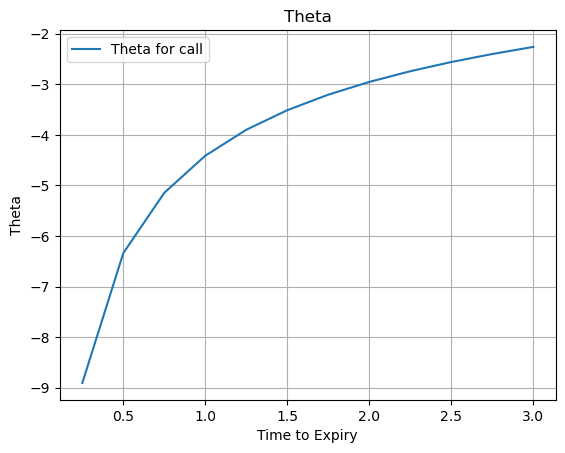

In [159]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for call'])